In [157]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [82]:
churn = pd.read_csv("Telco-Customer-Churn.csv")

In [83]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
print ("Rows :" ,churn.shape[0])
print ("Columns :" ,churn.shape[1])
print ("\nFeatures : \n" ,churn.columns.tolist())
print ("\nMissing values :  ", churn.isnull().sum().values.sum())
print ("\nUnique values :  \n",churn.nunique())

Rows : 7043
Columns : 21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [85]:
churn['TotalCharges'] = churn["TotalCharges"].replace(" ",np.nan)

In [86]:
churn = churn[churn["TotalCharges"].notnull()]
churn = churn.reset_index()[churn.columns]

In [87]:
churn['TotalCharges'] = churn["TotalCharges"].astype(float)

In [88]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    #churn.i  = churn.i.replace({'No internet service' : 'No'})
    print(i)
    

OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies


In [89]:
churn.OnlineSecurity = churn.OnlineSecurity.replace({'No internet service' : 'No'})

In [90]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
churn.OnlineSecurity = churn.OnlineSecurity.replace({'No internet service' : 'No'})
churn.OnlineBackup = churn.OnlineBackup.replace({'No internet service' : 'No'})
churn.DeviceProtection = churn.DeviceProtection.replace({'No internet service' : 'No'})
churn.TechSupport = churn.TechSupport.replace({'No internet service' : 'No'})
churn.StreamingTV = churn.StreamingTV.replace({'No internet service' : 'No'})
churn.StreamingMovies = churn.StreamingMovies.replace({'No internet service' : 'No'})
churn.MultipleLines = churn.MultipleLines.replace({'No phone service' : 'No'})

In [92]:
churn.MultipleLines.unique()

array(['No', 'Yes'], dtype=object)

In [93]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
churn.SeniorCitizen = churn.SeniorCitizen.replace({1:"Yes",0:"No"})

In [95]:
churn.Churn = churn.Churn.map(dict(Yes=1, No=0))

In [96]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [97]:
churned = churn[churn["Churn"] == 1]

In [98]:
churned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [99]:
not_churned  = churn[churn["Churn"] == 0]

In [100]:
not_churned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,No,No,No,10,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0


In [101]:
#Tenure to categorical column
def tenure_cat(churn) :
    
    if churn["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (churn["tenure"] > 12) & (churn["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (churn["tenure"] > 24) & (churn["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (churn["tenure"] > 48) & (churn["tenure"] <= 60) :
        return "Tenure_48-60"
    elif churn["tenure"] > 60 :
        return "Tenure_gt_60"
churn["tenure_group"] = churn.apply(lambda churn:tenure_cat(churn),axis = 1)


In [102]:
print(churn.tenure_group.nunique())

5


In [103]:
test1=churn.nunique()
print(test1)

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_group           5
dtype: int64


In [104]:
test2=churn.nunique() < 6
print(test2)

customerID          False
gender               True
SeniorCitizen        True
Partner              True
Dependents           True
tenure              False
PhoneService         True
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
TotalCharges        False
Churn                True
tenure_group         True
dtype: bool


In [105]:
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = churn.nunique()[churn.nunique() < 5].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in churn.columns if x not in cat_cols + target_col + Id_col]

In [106]:
print(cat_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [107]:

#correlation
correlation = churn.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)


In [108]:
print(correlation)

                  tenure  MonthlyCharges  TotalCharges     Churn
tenure          1.000000        0.246862      0.825880 -0.354049
MonthlyCharges  0.246862        1.000000      0.651065  0.192858
TotalCharges    0.825880        0.651065      1.000000 -0.199484
Churn          -0.354049        0.192858     -0.199484  1.000000


In [109]:
#Decision Tree for Classification
destree=pd.read_csv("Telco-Customer-Churn.csv")

In [110]:
destree.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
destree.OnlineSecurity = destree.OnlineSecurity.replace({'No internet service' : 'No'})
destree.OnlineBackup = destree.OnlineBackup.replace({'No internet service' : 'No'})
destree.DeviceProtection = destree.DeviceProtection.replace({'No internet service' : 'No'})
destree.TechSupport = destree.TechSupport.replace({'No internet service' : 'No'})
destree.StreamingTV = destree.StreamingTV.replace({'No internet service' : 'No'})
destree.StreamingMovies = destree.StreamingMovies.replace({'No internet service' : 'No'})
destree.MultipleLines = destree.MultipleLines.replace({'No phone service' : 'No'})

In [112]:
destree.InternetService = destree.InternetService.replace({'No': 0, 'DSL': 1, 'Fiber optic' : 2})
destree.Contract = destree.Contract.replace({'Month-to-month': 0, 'One year': 1, 'Two year' : 2})
destree.PaymentMethod = destree.PaymentMethod.replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)' : 2 ,'Credit card (automatic)' : 3})

In [113]:
destree.gender = destree.gender.map(dict(Female=1, Male=0))
destree.Partner = destree.Partner.map(dict(Yes=1, No=0))
destree.Dependents = destree.Dependents.map(dict(Yes=1, No=0))
destree.PhoneService = destree.PhoneService.map(dict(Yes=1, No=0 ))
destree.OnlineSecurity = destree.OnlineSecurity.map(dict(Yes=1, No=0))
destree.OnlineBackup = destree.OnlineBackup.map(dict(Yes=1, No=0))
destree.DeviceProtection = destree.DeviceProtection.map(dict(Yes=1, No=0))
destree.TechSupport = destree.TechSupport.map(dict(Yes=1, No=0))
destree.StreamingTV = destree.StreamingTV.map(dict(Yes=1, No=0))
destree.StreamingMovies = destree.StreamingMovies.map(dict(Yes=1, No=0))
destree.PaperlessBilling = destree.PaperlessBilling.map(dict(Yes=1, No=0))
destree.MultipleLines = destree.MultipleLines.map(dict(Yes=1, No=0))
destree.Churn = destree.Churn.map(dict(Yes=1, No=0 ))

In [114]:
destree.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [115]:
print (destree.dtypes)

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


In [116]:
destree=destree.drop('customerID',axis=1)

In [117]:
destree['MonthlyCharges']=destree["MonthlyCharges"].astype(int)

In [118]:
destree['TotalCharges'] = destree["TotalCharges"].replace(" ",np.nan)

In [119]:
destree = destree[destree["TotalCharges"].notnull()]
destree = destree.reset_index()[destree.columns]

In [120]:
destree['TotalCharges'] = destree["TotalCharges"].astype(float)

In [121]:
destree['TotalCharges'] = destree["TotalCharges"].astype(int)

In [122]:
x = destree.drop('Churn', axis=1)
y = destree['Churn']

In [123]:
print (destree.dtypes)

gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int32
TotalCharges        int32
Churn               int64
dtype: object


In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [125]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [126]:
y_pred = classifier.predict(x_test)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[826 199]
 [198 184]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1025
           1       0.48      0.48      0.48       382

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



In [128]:
#Decision Tree for Regression
desreg=destree

In [129]:
desreg.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29,29,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56,1889,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53,108,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42,1840,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70,151,1


In [130]:
x = desreg.drop('Churn', axis=1)
y = desreg['Churn']

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [132]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [133]:
y_pred = regressor.predict(x_test)

In [134]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
5552,0,0.333333
5805,0,0.000000
2640,0,0.000000
3976,1,0.000000
6429,1,1.000000
...,...,...
2752,0,0.000000
5693,1,1.000000
1657,1,1.000000
2761,0,0.000000


In [135]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2867699740834069
Mean Squared Error: 0.28264419019149156
Root Mean Squared Error: 0.5316429160550261


In [136]:
#Logistic Regression
logreg=destree

In [137]:
x = logreg.drop('Churn', axis=1)
y = logreg['Churn']

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [140]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1383  172]
 [ 263  292]]


In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1555
           1       0.63      0.53      0.57       555

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



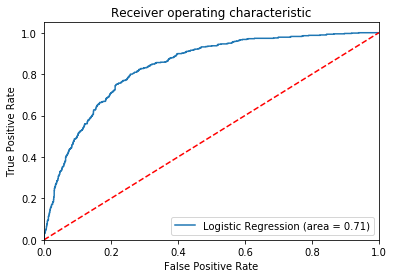

In [142]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [144]:
#Random Forest
rndfdata=destree

In [145]:
rndfdata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29,29,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56,1889,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53,108,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42,1840,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70,151,1


In [146]:
X = rndfdata.drop('Churn', axis=1)
y = rndfdata['Churn']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [148]:
#Random Forest

X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [149]:
random_classifier= RandomForestClassifier()
random_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [150]:
y_pred= random_classifier.predict(X_test)

In [151]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1311
           1       0.61      0.47      0.53       447

    accuracy                           0.79      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758



In [158]:
#Confusion Matrix
mat = confusion_matrix(y_test, y_pred)

In [162]:
mat

array([[1178,  133],
       [ 236,  211]], dtype=int64)

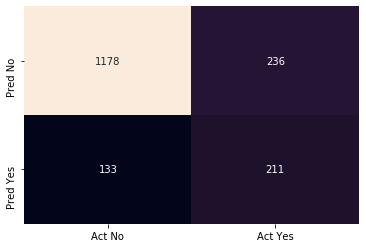

In [165]:
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False,
          xticklabels=['Act No','Act Yes'],
          yticklabels=['Pred No','Pred Yes'] )